In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
testdf = pd.read_csv("test.csv")

In [4]:
df.shape

(1460, 81)

In [5]:
testdf.shape

(1459, 80)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.isnull().sum().sum()

6965

In [8]:
testdf.isnull().sum().sum()

7000

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

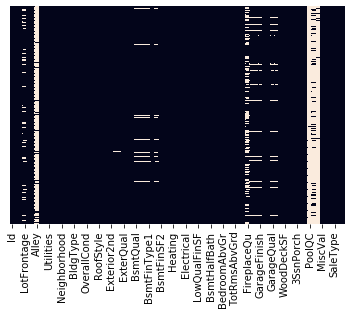

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
list1=[]
for i in df.columns:
    if(df[i].isnull().sum() > 1000):
        list1.append(i)
        print(i ," has ",df[i].isnull().sum()," null values")
        
print(list1)

Alley  has  1369  null values
PoolQC  has  1453  null values
Fence  has  1179  null values
MiscFeature  has  1406  null values
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


### Dropping the columns with null values more than 1000

In [12]:
for i in list1:
    df.drop(i,axis=1,inplace=True)
    testdf.drop(i,axis=1,inplace=True)

In [13]:
df.isnull().sum().sum()

1558

In [14]:
testdf.isnull().sum().sum()

1615

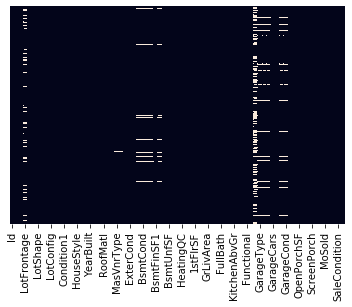

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

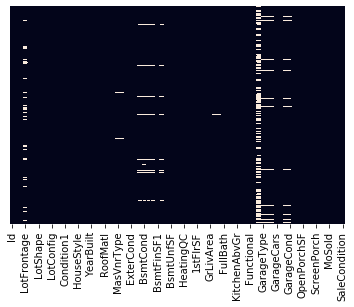

In [16]:
sns.heatmap(testdf.isnull(),yticklabels=False,cbar=False)

In [17]:
def Info(df):
    return (pd.DataFrame({
        "features":df.columns,
        "data_type":df.dtypes,
        "NoOfUnique":df.nunique(),
        "NullValues":df.isnull().sum(),
        #"Levels":[df[x].unique() for x in df.columns]
    }))

In [18]:
info = (Info(df))

In [19]:
info

,features,data_type,NoOfUnique,NullValues
Id,Id,int64,1460,0
MSSubClass,MSSubClass,int64,15,0
MSZoning,MSZoning,object,5,0
LotFrontage,LotFrontage,float64,110,259
LotArea,LotArea,int64,1073,0
...,...,...,...,...
MoSold,MoSold,int64,12,0
YrSold,YrSold,int64,5,0
SaleType,SaleType,object,9,0
SaleCondition,SaleCondition,object,6,0


In [20]:
for i in df.columns:
    print(i , " --",df[i].isnull().sum())

Id  -- 0
MSSubClass  -- 0
MSZoning  -- 0
LotFrontage  -- 259
LotArea  -- 0
Street  -- 0
LotShape  -- 0
LandContour  -- 0
Utilities  -- 0
LotConfig  -- 0
LandSlope  -- 0
Neighborhood  -- 0
Condition1  -- 0
Condition2  -- 0
BldgType  -- 0
HouseStyle  -- 0
OverallQual  -- 0
OverallCond  -- 0
YearBuilt  -- 0
YearRemodAdd  -- 0
RoofStyle  -- 0
RoofMatl  -- 0
Exterior1st  -- 0
Exterior2nd  -- 0
MasVnrType  -- 8
MasVnrArea  -- 8
ExterQual  -- 0
ExterCond  -- 0
Foundation  -- 0
BsmtQual  -- 37
BsmtCond  -- 37
BsmtExposure  -- 38
BsmtFinType1  -- 37
BsmtFinSF1  -- 0
BsmtFinType2  -- 38
BsmtFinSF2  -- 0
BsmtUnfSF  -- 0
TotalBsmtSF  -- 0
Heating  -- 0
HeatingQC  -- 0
CentralAir  -- 0
Electrical  -- 1
1stFlrSF  -- 0
2ndFlrSF  -- 0
LowQualFinSF  -- 0
GrLivArea  -- 0
BsmtFullBath  -- 0
BsmtHalfBath  -- 0
FullBath  -- 0
HalfBath  -- 0
BedroomAbvGr  -- 0
KitchenAbvGr  -- 0
KitchenQual  -- 0
TotRmsAbvGrd  -- 0
Functional  -- 0
Fireplaces  -- 0
FireplaceQu  -- 690
GarageType  -- 81
GarageYrBlt  -- 81
Ga

In [21]:
for i in testdf.columns:
    print(i , " --",testdf[i].isnull().sum())

Id  -- 0
MSSubClass  -- 0
MSZoning  -- 4
LotFrontage  -- 227
LotArea  -- 0
Street  -- 0
LotShape  -- 0
LandContour  -- 0
Utilities  -- 2
LotConfig  -- 0
LandSlope  -- 0
Neighborhood  -- 0
Condition1  -- 0
Condition2  -- 0
BldgType  -- 0
HouseStyle  -- 0
OverallQual  -- 0
OverallCond  -- 0
YearBuilt  -- 0
YearRemodAdd  -- 0
RoofStyle  -- 0
RoofMatl  -- 0
Exterior1st  -- 1
Exterior2nd  -- 1
MasVnrType  -- 16
MasVnrArea  -- 15
ExterQual  -- 0
ExterCond  -- 0
Foundation  -- 0
BsmtQual  -- 44
BsmtCond  -- 45
BsmtExposure  -- 44
BsmtFinType1  -- 42
BsmtFinSF1  -- 1
BsmtFinType2  -- 42
BsmtFinSF2  -- 1
BsmtUnfSF  -- 1
TotalBsmtSF  -- 1
Heating  -- 0
HeatingQC  -- 0
CentralAir  -- 0
Electrical  -- 0
1stFlrSF  -- 0
2ndFlrSF  -- 0
LowQualFinSF  -- 0
GrLivArea  -- 0
BsmtFullBath  -- 2
BsmtHalfBath  -- 2
FullBath  -- 0
HalfBath  -- 0
BedroomAbvGr  -- 0
KitchenAbvGr  -- 0
KitchenQual  -- 1
TotRmsAbvGrd  -- 0
Functional  -- 2
Fireplaces  -- 0
FireplaceQu  -- 730
GarageType  -- 76
GarageYrBlt  -- 78


#### Dropping Fireplacequ in both train and test data

In [22]:
df.drop("FireplaceQu", axis=1, inplace=True)
testdf.drop("FireplaceQu", axis=1, inplace=True)

### Function to impute null values using mean and median

In [23]:
def impute_train(x):
    if(df[x].isnull().sum() != 0):
        if(df[x].dtype == "int64" or df[x].dtype == "float"):
            df[x] = df[x].fillna(df[x].mean())
        else:
            df[x] = df[x].fillna(df[x].mode()[0])
            
    else:
        pass


def impute_test(x):
    if(testdf[x].isnull().sum() != 0):
        if(testdf[x].dtype == "int64" or testdf[x].dtype == "float"):
            testdf[x] = testdf[x].fillna(df[x].mean())
        else:
            testdf[x] = testdf[x].fillna(df[x].mode()[0])
            
    else:
        pass

In [24]:
for i in df.columns:
    impute_train(i)
    
for j in testdf.columns:
    impute_test(j)

In [25]:
df.isnull().sum().sum()

0

In [26]:
testdf.isnull().sum().sum()

0

In [27]:
cat_col = []
for i in df.columns:
    if(df[i].dtype == "object"):
        cat_col.append(i)

In [28]:
print(cat_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### Checking whether number of categories in train and test data are same or not.

In [29]:
for i in cat_col:
    print(i , "----",df[i].nunique(), "--", testdf[i].nunique())

MSZoning ---- 5 -- 5
Street ---- 2 -- 2
LotShape ---- 4 -- 4
LandContour ---- 4 -- 4
Utilities ---- 2 -- 1
LotConfig ---- 5 -- 5
LandSlope ---- 3 -- 3
Neighborhood ---- 25 -- 25
Condition1 ---- 9 -- 9
Condition2 ---- 8 -- 5
BldgType ---- 5 -- 5
HouseStyle ---- 8 -- 7
RoofStyle ---- 6 -- 6
RoofMatl ---- 8 -- 4
Exterior1st ---- 15 -- 13
Exterior2nd ---- 16 -- 15
MasVnrType ---- 4 -- 4
ExterQual ---- 4 -- 4
ExterCond ---- 5 -- 5
Foundation ---- 6 -- 6
BsmtQual ---- 4 -- 4
BsmtCond ---- 4 -- 4
BsmtExposure ---- 4 -- 4
BsmtFinType1 ---- 6 -- 6
BsmtFinType2 ---- 6 -- 6
Heating ---- 6 -- 4
HeatingQC ---- 5 -- 5
CentralAir ---- 2 -- 2
Electrical ---- 5 -- 4
KitchenQual ---- 4 -- 4
Functional ---- 7 -- 7
GarageType ---- 6 -- 6
GarageFinish ---- 3 -- 3
GarageQual ---- 5 -- 4
GarageCond ---- 5 -- 5
PavedDrive ---- 3 -- 3
SaleType ---- 9 -- 9
SaleCondition ---- 6 -- 6


#### We can observe there are many features with number of categories mismatch.

In [30]:
len(cat_col)

38

In [31]:
df.drop("Id",axis=1,inplace=True)
testdf.drop("Id", axis=1, inplace=True)

In [32]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
testdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
traindf = df.copy()

In [35]:
finaldf = pd.concat([df,testdf], axis=0)

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
finaldf.isnull().sum().sum() ## This is beacause test data wont have target variable.

1459

In [37]:
finaldf = pd.get_dummies(finaldf, drop_first=True)

In [38]:
finaldf.shape

(2919, 233)

In [39]:
print(traindf.shape)
print(testdf.shape)

(1460, 75)
(1459, 74)


In [40]:
train = finaldf[:1460]
test = finaldf[1460:]

In [41]:
print(train.shape)
print(test.shape)

(1460, 233)
(1459, 233)


In [42]:
test.drop("SalePrice", axis = 1,inplace=True)

C:\Users\Saikrishna\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
test.shape

(1459, 232)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = train.drop("SalePrice", axis = 1)
y = train["SalePrice"]

In [46]:
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size = 0.90)

### Model Building

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
LR = LinearRegression()

In [49]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
train_pred = LR.predict(x_train)
validation_pred = LR.predict(x_val)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
print("RMSE of train data: ", np.sqrt(mean_squared_error(train_pred,y_train)))
print("RMSE of validation data: ", np.sqrt(mean_squared_error(validation_pred,y_val)))

RMSE of train data:  18997.970226668243
RMSE of validation data:  45454.91867406435


In [99]:
test_pred = LR.predict(test)

In [62]:
sub = pd.read_csv("sample_submission.csv")

In [63]:
sub.shape[0]

1459

In [64]:
test_pred.shape

NameError: name 'test_pred' is not defined

In [103]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [107]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
sub.to_csv("LR.csv",index=False)

In [112]:
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
testpred1 = LR.predict(test)

In [114]:
sub.head()

,Id,SalePrice
0,1461,109068.192353
1,1462,163664.540441
2,1463,193014.737755
3,1464,197009.898538
4,1465,193692.786167


In [115]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = testpred1[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
sub.head()

,Id,SalePrice
0,1461,112959.103046
1,1462,161428.746317
2,1463,189435.233840
3,1464,196098.118291
4,1465,201966.121687


In [117]:
sub.to_csv("123.csv",index=False)

#### Lasso and Ridge regression

In [77]:
from sklearn.linear_model import Lasso, Ridge

In [79]:
lasso = Lasso()
lasso.fit(x_train,y_train)

C:\Users\Saikrishna\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274656029787.7629, tolerance: 824165548.6145694
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
train_pred = lasso.predict(x_train)

In [81]:
val_pred = lasso.predict(x_val)

In [73]:
def model_evaluation(train_pred,test_pred):
    print("---Train---")
    print("RMSE:" , np.sqrt(mean_squared_error(train_pred,y_train)))
    print('---Test---')
    print('RMSE:', np.sqrt(mean_squared_error(test_pred,y_val)))
    
    print("---------------------------------------------------")
    
    print('---Train---')
    print('MAPE ' ,(np.mean(np.abs((train_pred - y_train) / y_train)) * 100))
    print('---Test---')
    print('MAPE: ' ,(np.mean(np.abs((test_pred - y_val) / y_val)) * 100))
    
    print("---------------------------------------------------")
    
    print("---Train---")
    print("MAE: ", mean_absolute_error(train_pred,y_train))
    print('---Test---')
    print('MAE:', mean_absolute_error(test_pred,y_val))

In [92]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 20769.620616878477
---Test---
RMSE: 63777.40329415276
---------------------------------------------------
---Train---
MAPE  7.825894503559006
---Test---
MAPE:  11.963711104737374
---------------------------------------------------
---Train---
MAE:  13376.959887525974
---Test---
MAE: 20572.726573980643


In [99]:
test_pred2 = lasso.predict(test)

In [100]:
test_pred2.shape

(1459,)

In [98]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [102]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred2[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
sub.to_csv("lasso.csv", index=False)

#### RIDGE Regression

In [104]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
train_pred = ridge.predict(x_train)
val_pred = ridge.predict(x_val)

In [106]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 23732.352451527233
---Test---
RMSE: 33744.58376525592
---------------------------------------------------
---Train---
MAPE  8.861402425917213
---Test---
MAPE:  10.31751870945258
---------------------------------------------------
---Train---
MAE:  15195.40062121745
---Test---
MAE: 17145.993993425564


In [107]:
test_pred_ridge = ridge.predict(test)

In [108]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred_ridge[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
sub.to_csv("ridge.csv", index=False)

#### Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [112]:
train_pred = DT.predict(x_train)
val_pred = DT.predict(x_val)

In [113]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 0.0
---Test---
RMSE: 44555.20544200702
---------------------------------------------------
---Train---
MAPE  0.0
---Test---
MAPE:  15.737526803972807
---------------------------------------------------
---Train---
MAE:  0.0
---Test---
MAE: 26429.73287671233


In [57]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {
    "max_depth":[5,10,15],
    "min_samples_split":[5,10,15,20,30]
}

In [116]:
model_cv = GridSearchCV(DT,param_grid=param_grid, cv=5, n_jobs=-1)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 30]},
             pre_dispatch='2*n_jobs', 

In [120]:
model_cv.best_params_

{'max_depth': 10, 'min_samples_split': 10}

In [121]:
train_pred = model_cv.predict(x_train)
val_pred = model_cv.predict(x_val)

In [122]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 14640.177621769757
---Test---
RMSE: 42056.31799338823
---------------------------------------------------
---Train---
MAPE  6.181581935322442
---Test---
MAPE:  14.240391820840149
---------------------------------------------------
---Train---
MAE:  10346.077818126041
---Test---
MAE: 25192.45716306721


In [123]:
test_pred = model_cv.predict(test)

In [124]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
sub.to_csv("DT_params.csv",index=False)

#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [129]:
train_pred = RF.predict(x_train)
val_pred = RF.predict(x_val)

In [130]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 11081.037749113779
---Test---
RMSE: 28565.466932228584
---------------------------------------------------
---Train---
MAPE  3.812399342199193
---Test---
MAPE:  11.625471558363335
---------------------------------------------------
---Train---
MAE:  6497.388698630137
---Test---
MAE: 18045.220616438357


In [55]:
params = {
    "n_estimators" : [5,9, 18, 27, 36, 45],
    "max_depth" : [5,8,12,15],
    "min_samples_leaf" : [2, 4]
    
}

In [58]:
RF_grid = GridSearchCV(RF,param_grid=params,cv=5,n_jobs=-1)

In [60]:
RF_grid.fit(x_train,y_train)

In [134]:
train_pred = RF_grid.predict(x_train)
val_pred = RF_grid.predict(x_val)

In [135]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 13910.960929843313
---Test---
RMSE: 30223.85734116917
---------------------------------------------------
---Train---
MAPE  4.751650753647112
---Test---
MAPE:  11.673964938002696
---------------------------------------------------
---Train---
MAE:  7952.7708402338585
---Test---
MAE: 18019.933692239105


In [136]:
RF_grid.best_params_

{'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 45}

In [140]:
test_pred = RF.predict(test)

In [141]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
sub.to_csv("RF.csv", index=False)

#### SVM

In [49]:
from sklearn.svm import SVR

In [58]:
param_grid = {

'C': [0.1, 1, 10],
'gamma': [0.01, 0.1, 1], 
'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [59]:
svm = SVR()

In [62]:
svm_grid = GridSearchCV(svm,param_grid=param_grid,cv=5,n_jobs=-1)

In [ ]:
svm_grid.fit(x_train,y_train)

In [ ]:
train_pred = svm.predict(x_train)
val_pred = svm.predict(x_val)

In [57]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 80736.11476734602
---Test---
RMSE: 83495.21878666349
---------------------------------------------------
---Train---
MAPE  32.10502274000848
---Test---
MAPE:  31.67140334769016
---------------------------------------------------
---Train---
MAE:  55486.4739219052
---Test---
MAE: 55954.37119116053


#### XG Boost

In [61]:
from xgboost.sklearn import XGBRegressor

In [62]:
XGB = XGBRegressor()

In [63]:
XGB.fit(x_train,y_train)

C:\Users\Saikrishna\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:13:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
param_grid = { 
           "n_estimators" : [100,150,200],
            "subsample" :   [0.5,0.7],
            "colsample_bytree" : [0.5,0.6,0.7],
            "max_depth" : [5,10],
           "learning_rate" : [0.1,0.5,0.9],
            
}

In [56]:
train_pred = XGB.predict(x_train)
val_pred = XGB.predict(x_val)

In [61]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 14788.992149010597
---Test---
RMSE: 24429.925077372925
---------------------------------------------------
---Train---
MAPE  6.558308281838772
---Test---
MAPE:  9.013174279428906
---------------------------------------------------
---Train---
MAE:  10663.922751973934
---Test---
MAE: 14436.677707619863


In [65]:
test_pred = XGB.predict(test)

In [66]:
for i in range(sub.shape[0]):
    sub["SalePrice"][i] = test_pred[i]

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
sub.to_csv("xgb.csv",index=False)

### Saving the best model as pickle file and using it to predict

In [64]:
import pickle as pkl

In [79]:
# Saving the Modle to file in the current working directory

with open("Houserent_best_model.pkl", 'wb') as file:  
    pkl.dump(XGB, file)

In [82]:
# Load the Model back from file

with open("Houserent_best_model.pkl", 'rb') as file:  
    Pickled_XGB_model = pkl.load(file)


[15:26:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
# Use the loaded pickled model to make predictions 
train_pred = Pickled_XGB_model.predict(x_train) 

In [85]:
val_pred = Pickled_XGB_model.predict(x_val)

In [86]:
model_evaluation(train_pred,val_pred)

---Train---
RMSE: 14881.681126921263
---Test---
RMSE: 24498.832562024163
---------------------------------------------------
---Train---
MAPE  6.525014094549824
---Test---
MAPE:  9.551007197233607
---------------------------------------------------
---Train---
MAE:  10636.884316733258
---Test---
MAE: 16340.337328767124


In [76]:
import os

In [77]:
os.getcwd()

'C:\\Users\\Saikrishna\\Desktop\\INSOFE_Intern\\Saikrishna_3393_task2'

In [89]:
os.listdir(os.getcwd()) # we can see the pickled model in our current directory.

['.ipynb_checkpoints',
 '123.csv',
 'Capture.PNG',
 'dataset-2',
 'Dataset-3',
 'DT_params.csv',
 'Houserent_best_model.pkl',
 'lasso.csv',
 'LR.csv',
 'NLP',
 'RF.csv',
 'RF_grid.csv',
 'ridge.csv',
 'sample_submission.csv',
 'test.csv',
 'Titanic',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'xgb.csv']